In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [102]:
def get_max_bets_per_round(secondsperround, proportion_gas_used=1):
  # Constants
  play_static = 30948
  play_per_bet = 3149
  bet_range = [55868, 90068]

  blocksperround = (secondsperround) // 2
  gas_limit = blocksperround * 20000000 * proportion_gas_used

  gas_limit -= play_static

  max_bets = 0
  while gas_limit > 0:
    max_bets += 1
    gas_limit -= play_per_bet + np.random.randint(*bet_range)

  return  max_bets

xspace = np.arange(0, 1.05, 0.05)
roulettedata = []

for j in [15, 30, 45, 60, 90, 120]:
  for i in xspace:
    roulettedata.append((i * 100, j, get_max_bets_per_round(j, i)))

roulettedf = pd.DataFrame(roulettedata, columns=['Network Used (%)', 'Round Time (s)', 'Bets / Round'])

<AxesSubplot:xlabel='Network Used (%)', ylabel='Bets / Round'>

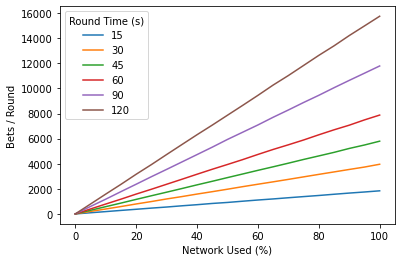

In [100]:
sns.lineplot(data=roulettedf, x='Network Used (%)', y='Bets / Round', hue='Round Time (s)', palette='tab10')

In [110]:
def games_per_block(proportion_gas_used):
  bet_range = [178286, 212486]
  roll_range = [86993, 92445]
  gas_limit = 20000000 * proportion_gas_used

  max_bets = 0
  while gas_limit > 0:
    max_bets += 1
    gas_limit -= np.random.randint(*roll_range) + np.random.randint(*bet_range)

  return max_bets

dicedata = []

for i in xspace:
  dicedata.append((i * 100, get_max_bets_per_round(j, i)))

dicedf = pd.DataFrame(dicedata, columns=['Network Used (%)', 'Bets / Block'])

Text(-3, 15680.000000000002, 'TPS Limit')

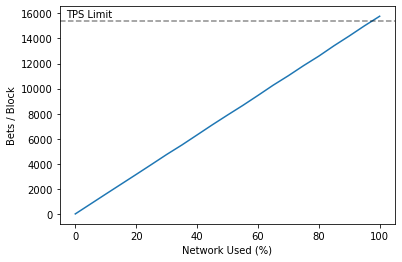

In [160]:
tpslimit = 7000 * 2.2

g = sns.lineplot(data=dicedf, x='Network Used (%)', y='Bets / Block', palette='tab10')
g.axhline(tpslimit, linestyle='--', color=(0, 0, 0, 0.45))
g.text(-3, 7000 * 2.24, "TPS Limit")